<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/Writing-a-thesis/blob/main/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [ ]:
x_train.shape , x_val.shape , y_train.shape , y_val.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

In [ ]:
flatten = tf.keras.layers.Flatten(input_shape = (28,28))
dense1 = tf.keras.layers.Dense(200, activation='relu')
drop1 = tf.keras.layers.Dropout(0.1)
dense2 = tf.keras.layers.Dense(100, activation='relu')
dense3 = tf.keras.layers.Dense(50, activation='relu')
dense4 = tf.keras.layers.Dense(10, activation='softmax')
model = tf.keras.Sequential([flatten,dense1,drop1, dense2, dense3, dense4])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 200)                 │         157,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 182,660 (713.52 KB)

 Trainable params: 182,660 (713.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6349 - loss: 6.3455 - val_accuracy: 0.7702 - val_loss: 0.6552
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7843 - loss: 0.6081 - val_accuracy: 0.8232 - val_loss: 0.4972
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8106 - loss: 0.5311 - val_accuracy: 0.8407 - val_loss: 0.4604
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8266 - loss: 0.4850 - val_accuracy: 0.8406 - val_loss: 0.4482
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8386 - loss: 0.4503 - val_accuracy: 0.8470 - val_loss: 0.4252
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8493 - loss: 0.4202 - val_accuracy: 0.8416 - val_loss: 0.4829
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8501 - loss: 0.4195 - val_accuracy: 0.8582 - val_loss: 0.3975
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8562 - loss: 0.3994 - 

In [ ]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8726 - loss: 0.4831


[0.46074378490448, 0.8708000183105469]

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

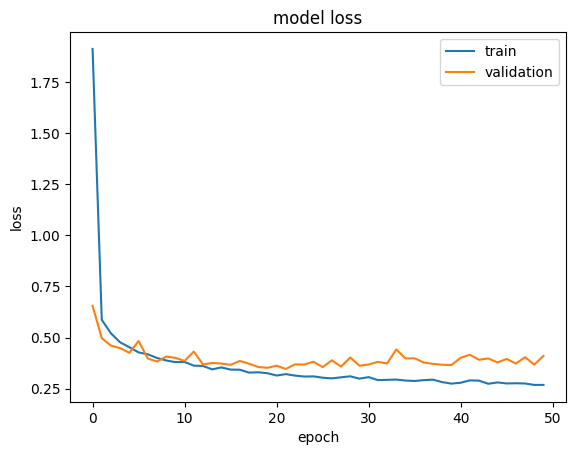

In [ ]:
# 손실곡선
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

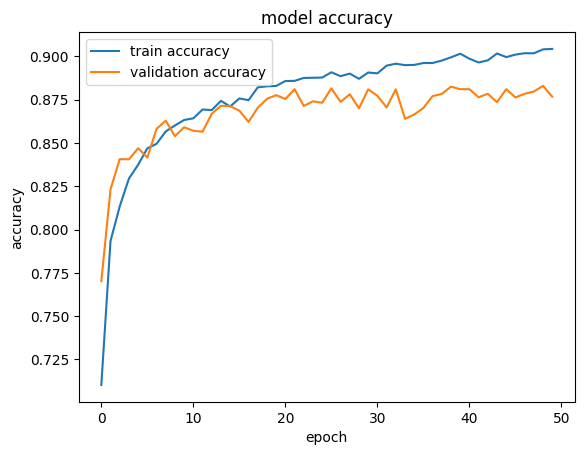

In [ ]:
# 정확도 곡선
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

과적합
  - 드랍아웃

In [ ]:
## 모델 저장 복원
# 모델 전체를 저장 - 모델의 구조
model.save('model.keras')

In [ ]:
# 모델 가중치만 저장 - 모델 구조(레이어들의 합)를 만든다음 가중치를 로드해서 적용
model.save_weights('model_weights.weights.h5')

In [ ]:
# 복원
model_2 = tf.keras.models.load_model('model.keras')


In [ ]:
# 가중치만 로드
new_model2 = tf.keras.models.Sequential([
    layers.Flatten(input_shape = (28,28)),
    layers.Dense(200, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(100, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(10, activation='softmax')
])
new_model2.load_weights('model_weights.weights.h5')

In [ ]:
model_2.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8726 - loss: 0.4831


[0.46074378490448, 0.8708000183105469]

In [ ]:
new_model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
new_model2.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8726 - loss: 0.4831


[0.46074378490448, 0.8708000183105469]

In [ ]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   3,   1,   0,   0,   7,   0,  37,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   2,   0,  27,  84,  11,   0,   0,   0,   0,   0,   0, 119,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   0,  88, 143, 110,   0,   0,   0,   0,  22,  93, 106,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          4,   0,  53, 129, 120, 147, 175, 157, 166, 135, 154, 168, 140,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,
          0,  11, 137, 130, 128, 160, 176, 159, 167, 178, 149, 151, 144,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,   2,   1,   0,   3,   0,
          0, 115, 114, 106, 137, 168, 153, 156, 165, 167, 143, 157, 158,
         11,   0],
       [  0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   3,   0,   0,
         89, 139,  90,  94, 153, 149, 131, 151, 169, 172, 143, 159, 169,
         48,   0],
       [  0,   0,   0,   0,   0,   0,   2,   4,   1,   0,   0,   0,  98,
        136, 110, 109, 110, 162, 135, 144, 149, 159, 167, 144, 158, 169,
        119,   0],
       [  0,   0,   2,   2,   1,   2,   0,   0,   0,   0,  26, 108, 117,
         99, 111, 117, 136, 156, 134, 154, 154, 156, 160, 141, 147, 156,
        178,   0],
       [  3,   0,   0,   0,   0,   0,   0,  21,  53,  92, 117, 111, 103,
        115, 129, 134, 143, 154, 165, 170, 154, 151, 154, 143, 138, 150,
        165,  43],
       [  0,   0,  23,  54,  65,  76,  85, 118, 128, 123, 111, 113, 118,
        127, 125, 139, 133, 136, 160, 140, 155, 161, 144, 155, 172, 161,
        189,  62],
       [  0,  68,  94,  90, 111, 114, 111, 114, 115, 127, 135, 136, 143,
        126, 127, 151, 154, 143, 148, 125, 162, 162, 144, 138, 153, 162,
        196,  58],
       [ 70, 169, 129, 104,  98, 100,  94,  97,  98, 102, 108, 106, 119,
        120, 129, 149, 156, 167, 190, 190, 196, 198, 198, 187, 197, 189,
        184,  36],
       [ 16, 126, 171, 188, 188, 184, 171, 153, 135, 120, 126, 127, 146,
        185, 195, 209, 208, 255, 209, 177, 245, 252, 251, 251, 247, 220,
        206,  49],
       [  0,   0,   0,  12,  67, 106, 164, 185, 199, 210, 211, 210, 208,
        190, 150,  82,   8,   0,   0,   0, 178, 208, 188, 175, 162, 158,
        151,  11],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

예측

In [ ]:
predict1 = new_model2.predict(test_images[0].reshape(1,28,28))  # 학습할때 전달한 모양이 3차원... 그래서 3차원으로 만듬....
print(predict)
predict2 = model_2.predict(test_images[0].reshape(1,28,28))  # 학습할때 전달한 모양이 3차원... 그래서 3차원으로 만듬....
print(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[6.4196263e-34 0.0000000e+00 5.6051939e-45 6.7520913e-32 3.4664858e-34
  3.8294151e-05 0.0000000e+00 1.9259789e-03 3.2093509e-20 9.9803573e-01]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[6.4196263e-34 0.0000000e+00 5.6051939e-45 6.7520913e-32 3.4664858e-34
  3.8294151e-05 0.0000000e+00 1.9259789e-03 3.2093509e-20 9.9803573e-01]]


In [ ]:
new_model2.predict(test_images[0].reshape(1,28,28)).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


9

In [ ]:
np.argmax(predict1)

9

In [ ]:
np.argmax(predict2)

9

In [ ]:
np.where(test_labels == 9)[0][0]

0

In [ ]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   3,   1,   0,   0,   7,   0,  37,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   2,   0,  27,  84,  11,   0,   0,   0,   0,   0,   0, 119,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   0,  88, 143, 110,   0,   0,   0,   0,  22,  93, 106,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          4,   0,  53, 129, 120, 147, 175, 157, 166, 135, 154, 168, 140,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,
          0,  11, 137, 130, 128, 160, 176, 159, 167, 178, 149, 151, 144,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,   2,   1,   0,   3,   0,
          0, 115, 114, 106, 137, 168, 153, 156, 165, 167, 143, 157, 158,
         11,   0],
       [  0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   3,   0,   0,
         89, 139,  90,  94, 153, 149, 131, 151, 169, 172, 143, 159, 169,
         48,   0],
       [  0,   0,   0,   0,   0,   0,   2,   4,   1,   0,   0,   0,  98,
        136, 110, 109, 110, 162, 135, 144, 149, 159, 167, 144, 158, 169,
        119,   0],
       [  0,   0,   2,   2,   1,   2,   0,   0,   0,   0,  26, 108, 117,
         99, 111, 117, 136, 156, 134, 154, 154, 156, 160, 141, 147, 156,
        178,   0],
       [  3,   0,   0,   0,   0,   0,   0,  21,  53,  92, 117, 111, 103,
        115, 129, 134, 143, 154, 165, 170, 154, 151, 154, 143, 138, 150,
        165,  43],
       [  0,   0,  23,  54,  65,  76,  85, 118, 128, 123, 111, 113, 118,
        127, 125, 139, 133, 136, 160, 140, 155, 161, 144, 155, 172, 161,
        189,  62],
       [  0,  68,  94,  90, 111, 114, 111, 114, 115, 127, 135, 136, 143,
        126, 127, 151, 154, 143, 148, 125, 162, 162, 144, 138, 153, 162,
        196,  58],
       [ 70, 169, 129, 104,  98, 100,  94,  97,  98, 102, 108, 106, 119,
        120, 129, 149, 156, 167, 190, 190, 196, 198, 198, 187, 197, 189,
        184,  36],
       [ 16, 126, 171, 188, 188, 184, 171, 153, 135, 120, 126, 127, 146,
        185, 195, 209, 208, 255, 209, 177, 245, 252, 251, 251, 247, 220,
        206,  49],
       [  0,   0,   0,  12,  67, 106, 164, 185, 199, 210, 211, 210, 208,
        190, 150,  82,   8,   0,   0,   0, 178, 208, 188, 175, 162, 158,
        151,  11],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
# 테스트 이미지 10개를 예측해서 실제하고 비교
predict_10 = new_model2.predict(test_images[:10])
np.argmax(predict_10, axis=1) , test_labels[:10]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


(array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]),
 array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8))

콜백
  - 에포크만큼 학습하면서 중간에 어떤 조건이 맞을때 실행하는 함수


In [ ]:
# 모듈로 만든 ann
import sys
sys.path.append('/content/drive/MyDrive/메가스터디 - AI')


In [ ]:
import ann

In [ ]:
new_model3 = ann.getNetwork()
# 모델 전체를 저장
check_cb = tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)
new_model3.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[check_cb])

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6289 - loss: 3.9227 - val_accuracy: 0.8018 - val_loss: 0.5527
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7975 - loss: 0.5787 - val_accuracy: 0.8256 - val_loss: 0.4769
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8215 - loss: 0.5013 - val_accuracy: 0.8365 - val_loss: 0.4445
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8349 - loss: 0.4508 - val_accuracy: 0.8455 - val_loss: 0.4330
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8421 - loss: 0.4301 - val_accuracy: 0.8453 - val_loss: 0.4427
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8471 - loss: 0.4148 - val_accuracy: 0.8474 - val_loss: 0.4359
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8564 - loss: 0.4013 - val_accuracy: 0.8591 - val_loss: 0.3936
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8583 - loss: 0

In [ ]:
check_cb.best

0.35059988498687744

In [ ]:
new_model3.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8761 - loss: 0.7205


[0.5372648239135742, 0.8780999779701233]

In [ ]:
best_model = tf.keras.models.load_model('best_model.keras')


In [ ]:
best_model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8727 - loss: 0.3832


[0.3894714415073395, 0.8729000091552734]

과적합
  - dropout
    - 층과 층 사이에 존재한다.

In [ ]:
flatten = tf.keras.layers.Flatten(input_shape = (28,28))
dense1 = tf.keras.layers.Dense(1024, activation='relu')
drop1 = tf.keras.layers.Dropout(0.05)
dense2 = tf.keras.layers.Dense(512, activation='relu')
drop2 = tf.keras.layers.Dropout(0.03)
dense3 = tf.keras.layers.Dense(256, activation='relu')
drop3 = tf.keras.layers.Dropout(0.01)
dense4 = tf.keras.layers.Dense(64, activation='relu')
drop4 = tf.keras.layers.Dropout(0.01)
dense5 = tf.keras.layers.Dense(10, activation='softmax')
dropout_model = tf.keras.Sequential([flatten,dense1,drop1, dense2,drop2, dense3,drop3, dense4,drop4, dense5])
dropout_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_19 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 1024)                │         803,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,477,066 (5.63 MB)

 Trainable params: 1,477,066 (5.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
dropout_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
check_cb = tf.keras.callbacks.ModelCheckpoint('best_model2.keras', save_best_only=True)
history2 = dropout_model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[check_cb])

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5990 - loss: 5.7710 - val_accuracy: 0.7451 - val_loss: 0.6334
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7508 - loss: 0.6283 - val_accuracy: 0.7908 - val_loss: 0.5520
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8044 - loss: 0.5292 - val_accuracy: 0.8236 - val_loss: 0.5000
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8230 - loss: 0.4972 - val_accuracy: 0.8451 - val_loss: 0.4474
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8303 - loss: 0.4820 - val_accuracy: 0.8499 - val_loss: 0.4295
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8516 - loss: 0.4134 - val_accuracy: 0.8520 - val_loss: 0.4235
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8570 - loss: 0.4029 - val_accuracy: 0.8620 - val_loss: 0.4015
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8609 - loss: 0

In [ ]:
dropout_model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8833 - loss: 0.8312


[0.7713806629180908, 0.883899986743927]

In [ ]:
best_model = tf.keras.models.load_model('best_model2.keras')

In [ ]:
best_model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8749 - loss: 0.3838


[0.38728031516075134, 0.8748000264167786]

In [ ]:
best_model.save('/content/drive/MyDrive/메가스터디 - AI/best_model2.keras')

In [ ]:
dropout_model.save('/content/drive/MyDrive/메가스터디 - AI/module/dropout_model2.keras')

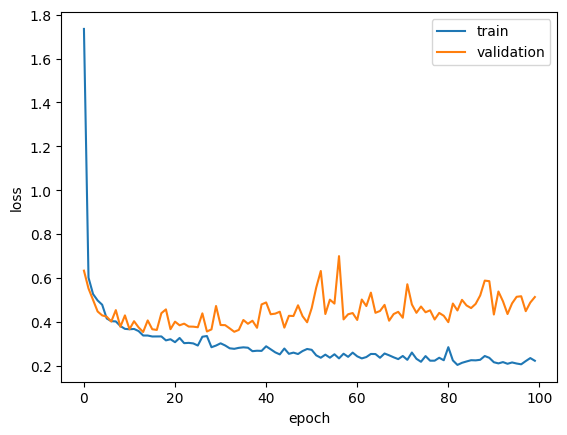

In [ ]:
# 손실곡선
plt.plot(history2.history['loss'], label = 'train loss')
plt.plot(history2.history['val_loss'], label = 'validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

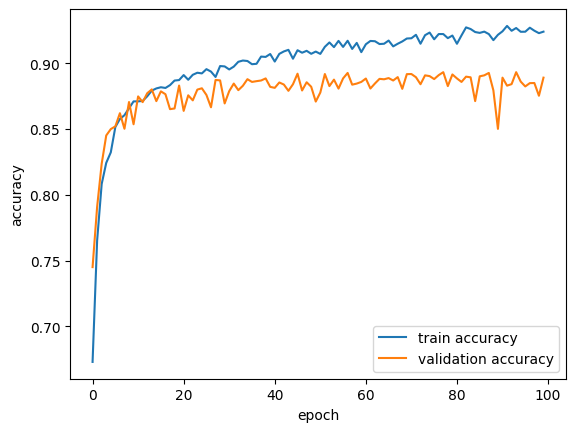

In [ ]:
# 정확도 곡선
plt.plot(history2.history['accuracy'], label = 'train accuracy')
plt.plot(history2.history['val_accuracy'], label = 'validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()